In [2]:
#importing libralies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from datetime import datetime

In [87]:
#reading data
sales_data=pd.read_csv('supermarket_sales - Sheet1.csv')
sales_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [29]:
#information about data
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [89]:
sales_data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [5]:
sales_data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [6]:
#looking at columns
sales_data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [28]:
#converting date from object to date type
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%m/%d/%Y')

In [25]:
sales_data['Time'] = pd.to_datetime(sales_data['Time'], format='%H:%M')

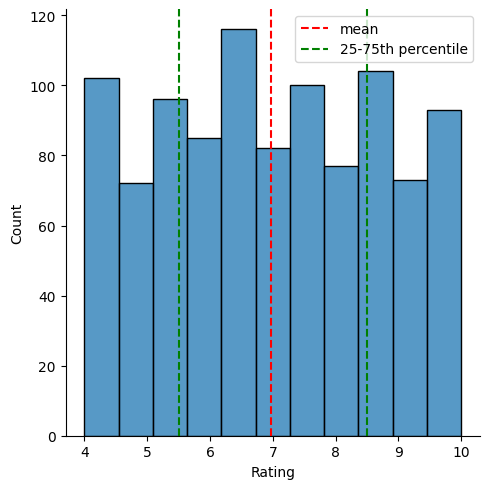

In [49]:
#distribution of rating
sns.displot(sales_data['Rating'])
plt.axvline(x=np.mean(sales_data['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(sales_data['Rating'], 25), c='green', ls='--', label='25-75th percentile')
plt.axvline(x=np.percentile(sales_data['Rating'], 75), c='green', ls='--')
plt.legend(loc='upper right')

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

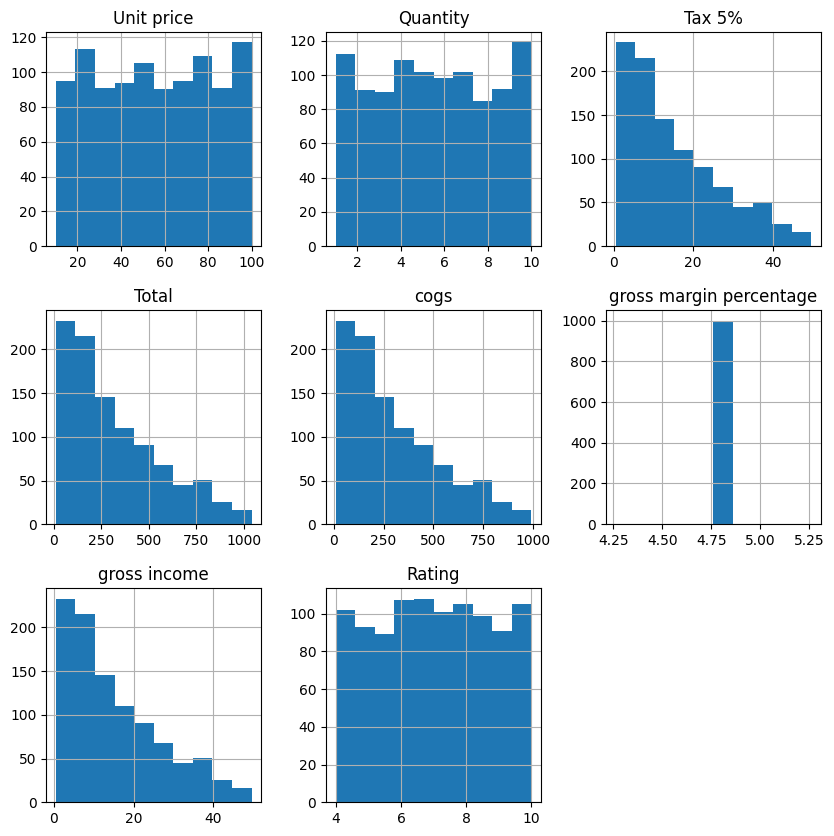

In [51]:
sales_data.hist(figsize=(10,10))

<Axes: xlabel='count', ylabel='Branch'>

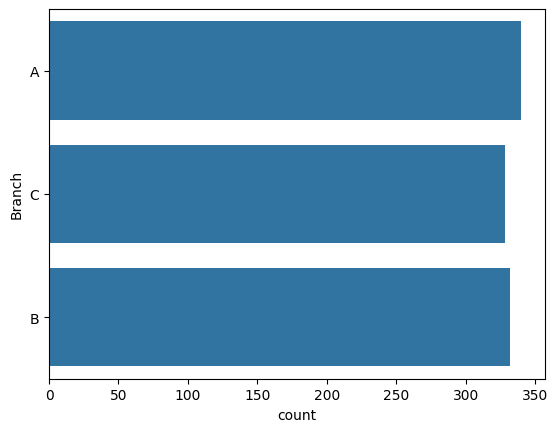

In [55]:
sns.countplot(sales_data['Branch'])

<Axes: xlabel='count', ylabel='Gender'>

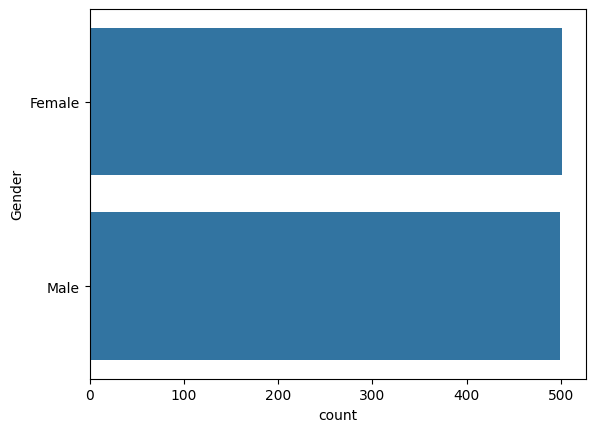

In [57]:
sns.countplot(sales_data['Gender'])

In [60]:
sales_data['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

<Axes: xlabel='Rating', ylabel='gross income'>

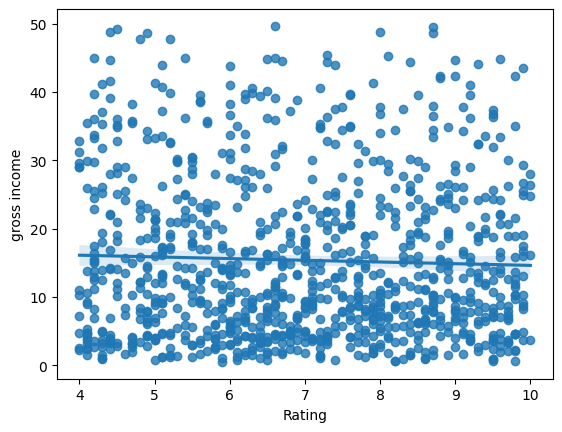

In [66]:
#bivariate analysis - finding relationship between customer ratings and income
sns.regplot(x=sales_data['Rating'],y=sales_data['gross income'])

C:\Users\RONALD AINEBYONA\AppData\Local\Temp\ipykernel_9600\754994791.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sales_data.corr(), annot=True)


<Axes: >

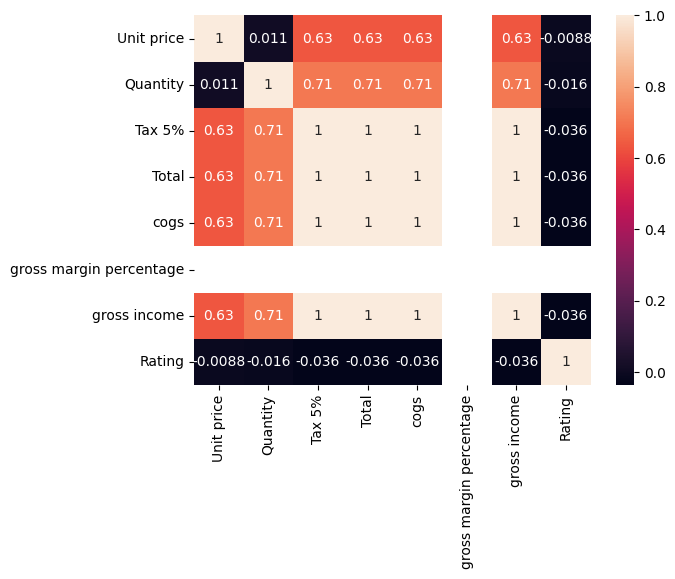

In [68]:
#plotting heatmap
sns.heatmap(sales_data.corr(), annot=True)

<Axes: xlabel='cogs', ylabel='gross income'>

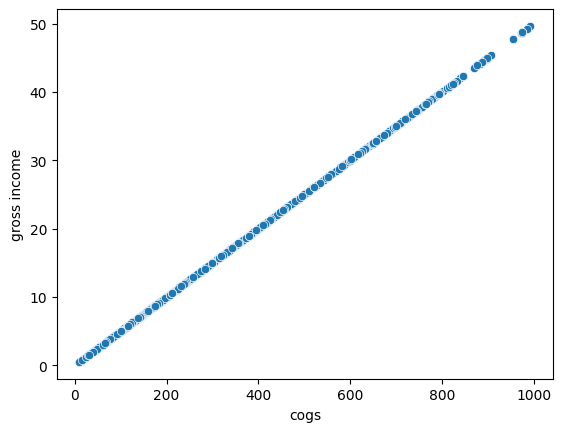

In [77]:
sns.scatterplot(x=sales_data['cogs'],y=sales_data['gross income'])

<Axes: xlabel='Branch', ylabel='gross income'>

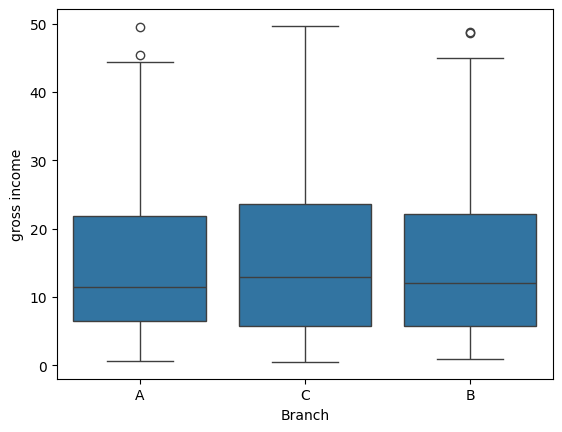

In [70]:
sns.boxplot(x=sales_data['Branch'], y=sales_data['gross income'])

<Axes: xlabel='Gender', ylabel='gross income'>

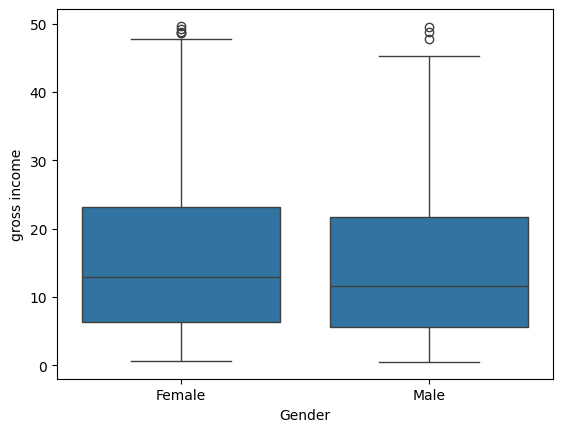

In [72]:
sns.boxplot(x=sales_data['Gender'], y=sales_data['gross income'])

In [75]:
sales_data.groupby('Date').mean()

C:\Users\RONALD AINEBYONA\AppData\Local\Temp\ipykernel_9600\141630743.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_data.groupby('Date').mean()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
1/1/2019,54.995833,6.750000,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333
1/10/2019,58.051111,6.111111,18.841000,395.661000,376.820000,4.761905,18.841000,6.066667
1/11/2019,59.962500,5.000000,12.589063,264.370313,251.781250,4.761905,12.589063,7.100000
1/12/2019,56.900000,7.272727,22.444864,471.342136,448.897273,4.761905,22.444864,6.845455
1/13/2019,53.150000,5.000000,11.672400,245.120400,233.448000,4.761905,11.672400,6.720000
...,...,...,...,...,...,...,...,...
3/5/2019,58.235882,6.058824,17.453441,366.522265,349.068824,4.761905,17.453441,6.723529
3/6/2019,51.197273,5.727273,13.387864,281.145136,267.757273,4.761905,13.387864,7.209091
3/7/2019,47.862222,4.111111,7.609833,159.806500,152.196667,4.761905,7.609833,6.988889


In [88]:
sales_data.duplicated().sum()

0

In [96]:
!pip install pandas-profiling
from pandas_profiling import ProfileReport

# Read the CSV file into a DataFrame
report = pd.read_csv('supermarket_sales - Sheet1.csv')

# Generate the profiling report
prof = ProfileReport(report)
prof.to_file("report.html")  # Save the report to an HTML file



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


ImportError: cannot import name 'DataError' from 'pandas.core.base' (C:\Users\RONALD AINEBYONA\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\base.py)

In [95]:
!pip install --upgrade pandas


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandasai 1.5.5 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 2.0 MB/s eta 0:00:06
   ---------------------------------------- 0.1/11.6 MB 871.5 kB/s eta 0:00:14
   ---------------------------------------- 0.1/11.6 MB 939.4 kB/s eta 0:00:13
    --------------------------------------- 0.2/11.6 MB 833.5 kB/s eta 0:00:14
    --------------------------------------- 0.3/11.6 MB 1.1 MB/s eta 0:00:11
   - -------------------------------------- 0.5/11.6 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.5/11.6 MB 1.7 MB/s eta 0:00:07
   -- ------------------------------------- 0.8/11.6 MB 2.2 MB/s eta 0:00:05
   --- ------------------------------------ 1.1/11.6 MB 2.8 MB/s eta 0:00:04
   ----- ---------------------------------- 1.5/11.6 MB 3.1 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.6 MB 3.3 MB/s eta 0:00:03
   ------ --------------------------------- 2.0/11.6 MB 3.6 MB/s eta 0:00:03